Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')
   age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608        1
1   27   1      10        6      31     17.3   1.362202  4.000798        0
2   40   1      15       14      55      5.5   0.856075  2.168925        0
3   41   1      15       14     120      2.9   2.658720  0.821280        0
4   24   2       2        0      28     17.3   1.787436  3.056564        1
              age          ed      employ     address      income     debtinc  \
count  700.000000  700.000000  700.000000  700.000000  700.000000  700.000000   
mean    34.860000    1.722857    8.388571    8.278571   45.601429   10.260571   
std      7.997342    0.928206    6.658039    6.824877   36.814226    6.827234   
min     20.000000    1.000000    0.000000    0.000000   14.000000    0.400000   
25%     29.000000  

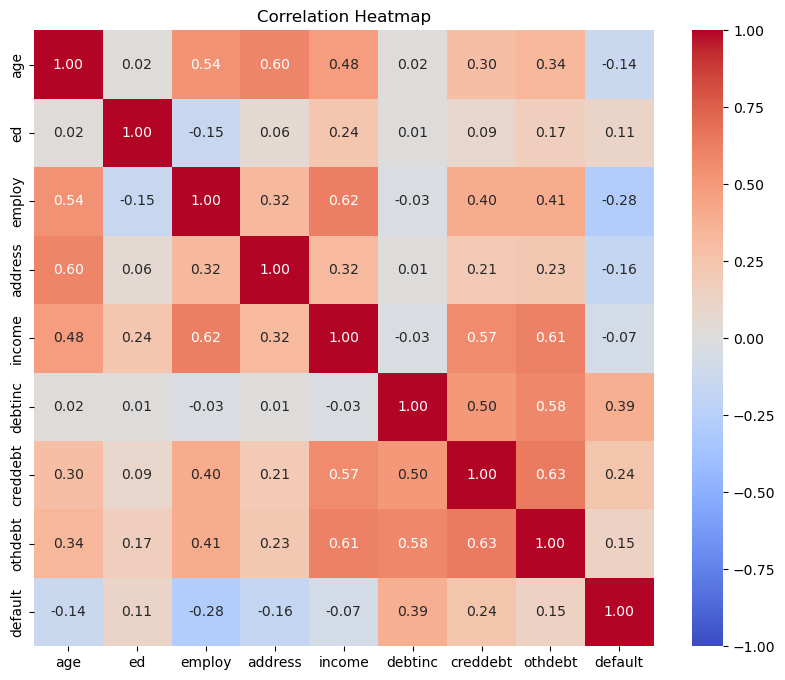

/Users/kaiwan.savai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


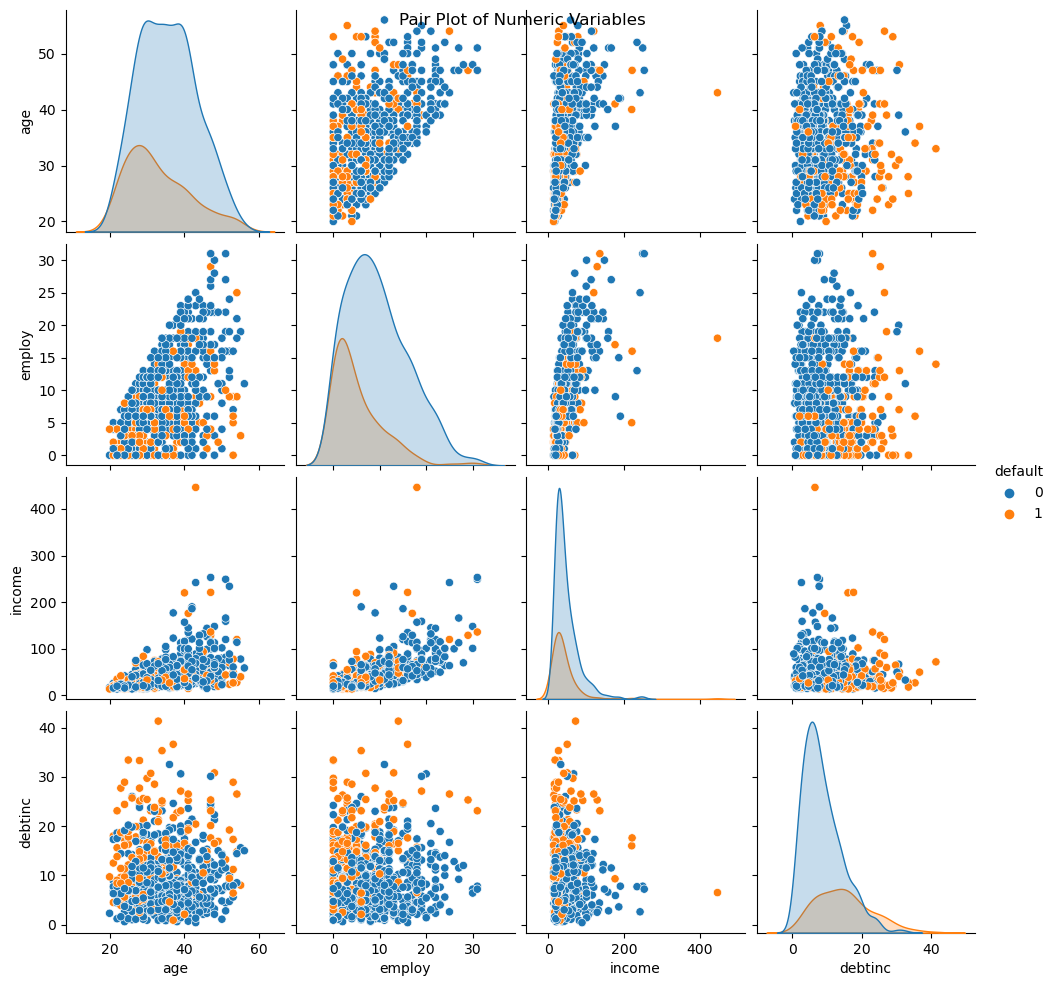

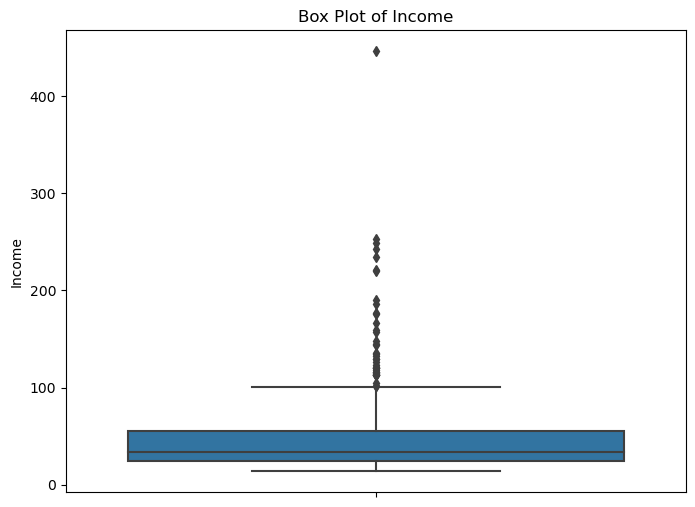

In [2]:
#Exploration Code
#Import necessary libaries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Load the dataset
url = 'https://github.com/Safa1615/Dataset--loan/blob/main/bank-loan.csv?raw=true'
data = pd.read_csv(url, nrows=700)

###################################################
#THE NEW STUFF STARTS HERE                                                                 #
###################################################

print(data.columns)

# Display the first few rows of the dataset
print(data.head())

# Summary statistics of the dataset
print(data.describe())

# Check data types
print(data.dtypes)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize correlation between numeric variables
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",vmin=-1,vmax=+1)
plt.title("Correlation Heatmap")
plt.show()

# Create a pair plot to visualize relationships between numeric variables
sns.pairplot(data, vars=['age', 'employ', 'income', 'debtinc'], hue='default')
plt.suptitle("Pair Plot of Numeric Variables")
plt.show()

# Create a box plot to visualize the distribution of 'income'
plt.figure(figsize=(8, 6))
sns.boxplot(y='income', data=data)
plt.title("Box Plot of Income")
plt.ylabel("Income")
plt.show()

In [ ]:
#Few Inferences Based on the Heat Map ( by the way I changed the scale from -1 to +1)
#1)There is not a strong corelation found between the education and income in this case. This contradicts the theoritcal rule, the more educated
#  you are the more income you earn, clearly that's not the case here.
#2)There is significant corelation between credit debt, other debt and income, which makes perfect sense 
#3) Another thing that is perplexing is not a strong corelation between debtinc % vs loan default, which makes me believe
# most candidates with higher debtinc % have still managed to not being defaulted which then makes me to look at the PairPlot

#Pair Plot Inference -  More than 80% defaulters belong to this bracket:
#Candidates with ( Income < 100K && debtinc > 20% && employed for < 10yrs )
# and so this is my most susceptible bucket which I will avoid in future.Any candidate that checks the above 3 criteria won't be approved for loan

In [3]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/03/e6/4aef6799badc2693548559bad5b56d56cfe89eada337c815fdfe92175250/xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.9 MB/s eta 0:00:00a 0:00:01


In [10]:
# Import necessary libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
url = 'https://github.com/Safa1615/Dataset--loan/blob/main/bank-loan.csv?raw=true'
data = pd.read_csv(url, nrows=700)

# Split the data into features (independent variables) and the target variable (default or not)
X = data.drop('default', axis=1)
y = data['default']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a classification model (in this case, a XGBoost classifier)
xgb_classifier = xgb.XGBClassifier(max_depth=6, learning_rate=0.3)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.82
Confusion Matrix:
[[148  13]
 [ 24  25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       161
           1       0.66      0.51      0.57        49

    accuracy                           0.82       210
   macro avg       0.76      0.71      0.73       210
weighted avg       0.81      0.82      0.82       210

